# 第六章　照明設備 / Chapter 6 Lighting

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from pyhees.section6 import calc_E_E_L_d_t

# 試算例

In [39]:
def get_default_lighting():
    
    n_p = 4.0
    A_A = 120.08
    A_MR = 0
    A_OR = 0

    L = {"MR_installed" : "設置しない","MR_power" : None,"MR_multi" : None,"MR_dimming" : None,
        "has_OR" : None,"OR_installed" : None,"OR_power" : None,"OR_dimming" : None,
        "has_NO" : None,"NO_installed" : None,"NO_power" : None,"NO_sensor" : None
        }
    
    return n_p, A_A, A_MR, A_OR, L
    

In [40]:
def get_each_graph(_E_E_L_d_t):

    import matplotlib.pyplot as plt

    _E_E_L_d = np.sum(_E_E_L_d_t.reshape(365,24), axis = 1)

    fig = plt.figure(figsize = (20,7))

    grh_day = fig.add_subplot(211)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(_E_E_L_d, label = "E_L")
    grh_day.legend()

    grh_date = fig.add_subplot(212)
    grh_date.set_ylabel('MJ/h')
    grh_date.set_xlabel('hour')
    grh_date.plot(_E_E_L_d_t.reshape(365,24)[334], label = "E_L:12/1", marker = "x")
    grh_date.plot(_E_E_L_d_t.reshape(365,24)[59], label = "E_L:3/1")
    grh_date.legend()

    plt.show()


### 計算条件1

初期条件での計算

In [41]:
n_p, A_A, A_MR, A_OR, L = get_default_lighting()

testcase1 = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)
np.sum(testcase1)

213.4404490196078

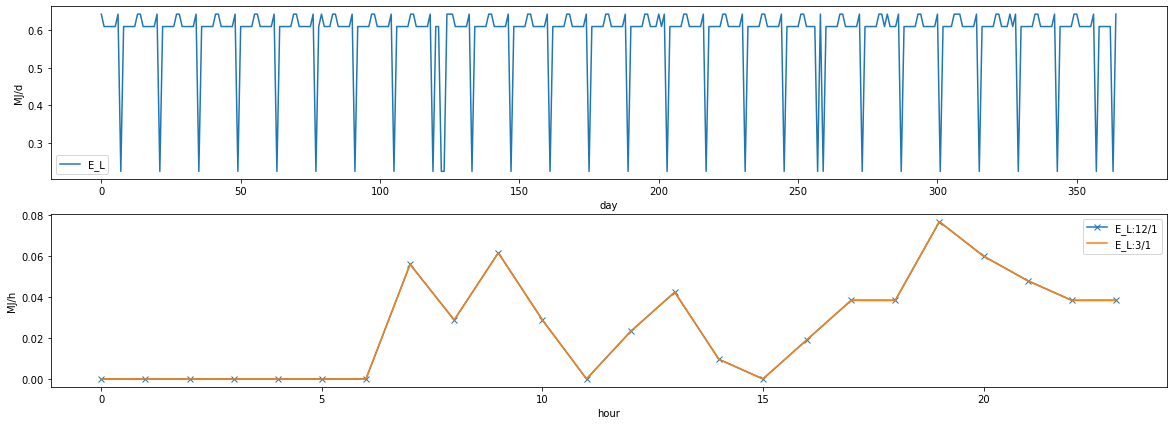

In [42]:
get_each_graph(testcase1)

### 計算条件2

- 主居室床面積29.81m2、その他の居室床面積51.34m2
- その他の居室：照明設置しない
- 非居室：照明設置しない

In [43]:
n_p, A_A, A_MR, A_OR, L = get_default_lighting()
A_MR = 29.81
A_OR = 51.34
L = {"MR_installed" : "設置しない","MR_power" : None,"MR_multi" : None,"MR_dimming" : None,
     "has_OR" : "有","OR_installed" : "設置しない","OR_power" : None,"OR_dimming" : None,
     "has_NO" : "有","NO_installed" : "設置しない","NO_power" : None,"NO_sensor" : None
    }


testcase2 = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)
np.sum(testcase2)

1112.2363510939394

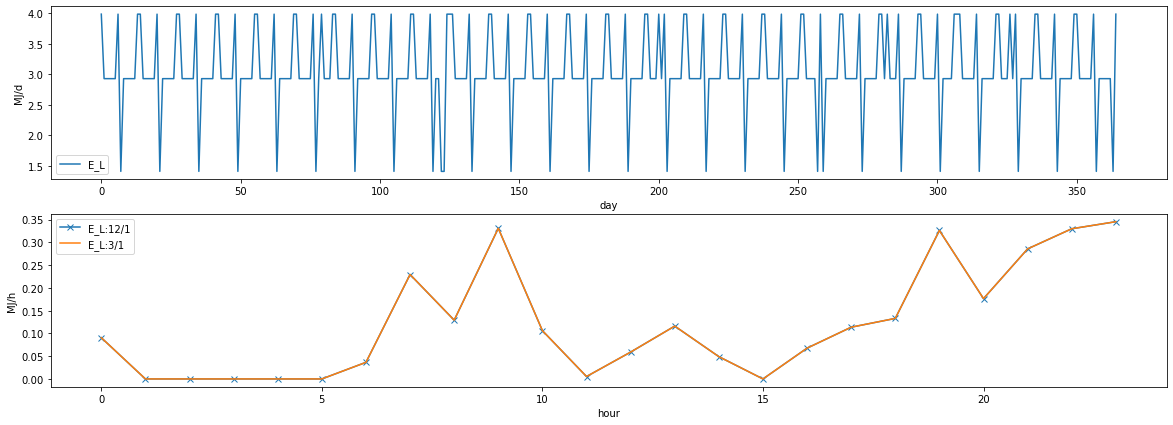

In [44]:
get_each_graph(testcase2)

### 計算条件3

- 主居室床面積29.81m2、その他の居室床面積51.34m2
- 主居室：照明設置する。LED使用、多灯分散、調光制御
- その他の居室：照明設置する。LED使用、調光制御
- 非居室：照明設置する。LED使用、人感センサー

In [45]:
n_p, A_A, A_MR, A_OR, L = get_default_lighting()
A_MR = 29.81
A_OR = 51.34

L = {"MR_installed" : "設置する","MR_power" : "すべての機器においてLEDを使用している","MR_multi" : "採用する","MR_dimming" : "採用する",
     "has_OR" : "有","OR_installed" : "設置する","OR_power" : "すべての機器においてLEDを使用している","OR_dimming" : "採用する",
     "has_NO" : "有","NO_installed" : "設置する","NO_power" : "すべての機器においてLEDを使用している","NO_sensor" : "採用する"
    }

testcase3 = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)
np.sum(testcase3)

452.2778555425926

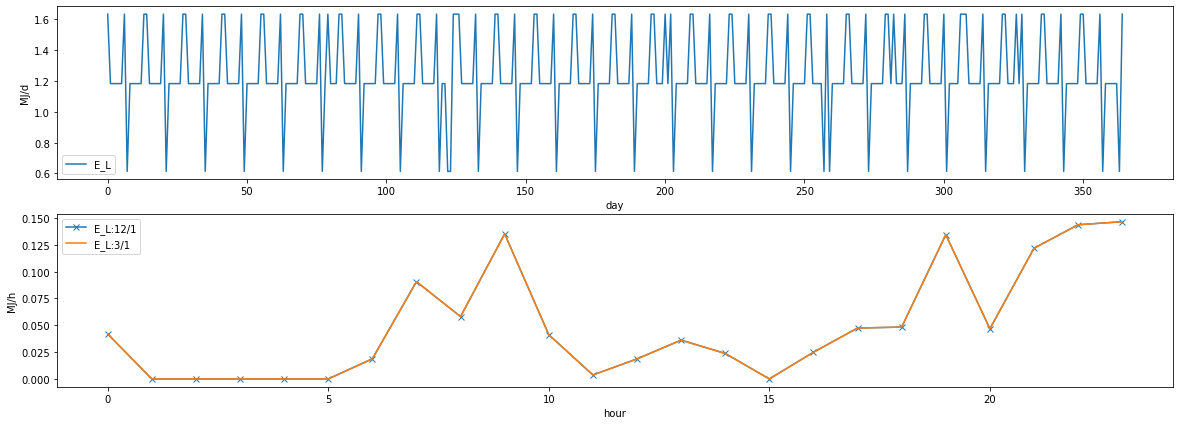

In [46]:
get_each_graph(testcase3)

### 計算条件4

- 主居室床面積29.81m2、その他の居室床面積51.34m2
- 主居室：照明設置する。白熱灯以外使用
- その他の居室：照明設置する。白熱灯以外使用
- 非居室：照明設置する。白熱灯以外使用

In [47]:
n_p, A_A, A_MR, A_OR, L = get_default_lighting()
A_MR = 29.81
A_OR = 51.34

L = {"MR_installed" : "設置する","MR_power" : "すべての機器において白熱灯以外を使用している","MR_multi" : "採用しない","MR_dimming" : "採用しない",
     "has_OR" : "有","OR_installed" : "設置する","OR_power" : "すべての機器において白熱灯以外を使用している","OR_dimming" : "採用しない",
     "has_NO" : "有","NO_installed" : "設置する","NO_power" : "すべての機器において白熱灯以外を使用している","NO_sensor" : "採用しない"
    }

testcase4 = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)
np.sum(testcase4)

686.3922448844156

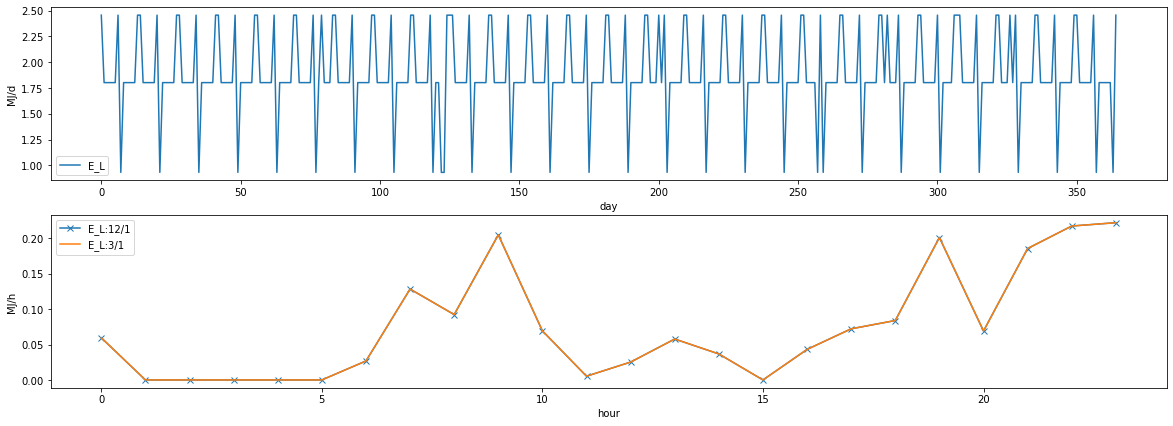

In [48]:
get_each_graph(testcase4)

### 計算条件5

- 主居室床面積29.81m2、その他の居室床面積51.34m2
- 主居室：照明設置する。白熱灯使用
- その他の居室：照明設置する。白熱灯使用
- 非居室：照明設置する。白熱灯使用

In [49]:
n_p, A_A, A_MR, A_OR, L = get_default_lighting()
A_MR = 29.81
A_OR = 51.34

L = {"MR_installed" : "設置する","MR_power" : "いずれかの機器において白熱灯を使用している","MR_multi" : None,"MR_dimming" : "採用しない",
     "has_OR" : "有","OR_installed" : "設置する","OR_power" : "いずれかの機器において白熱灯を使用している","OR_dimming" : "採用しない",
     "has_NO" : "有","NO_installed" : "設置する","NO_power" : "いずれかの機器において白熱灯を使用している","NO_sensor" : "採用しない"
    }

testcase5 = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)
np.sum(testcase5)

1399.841839101876

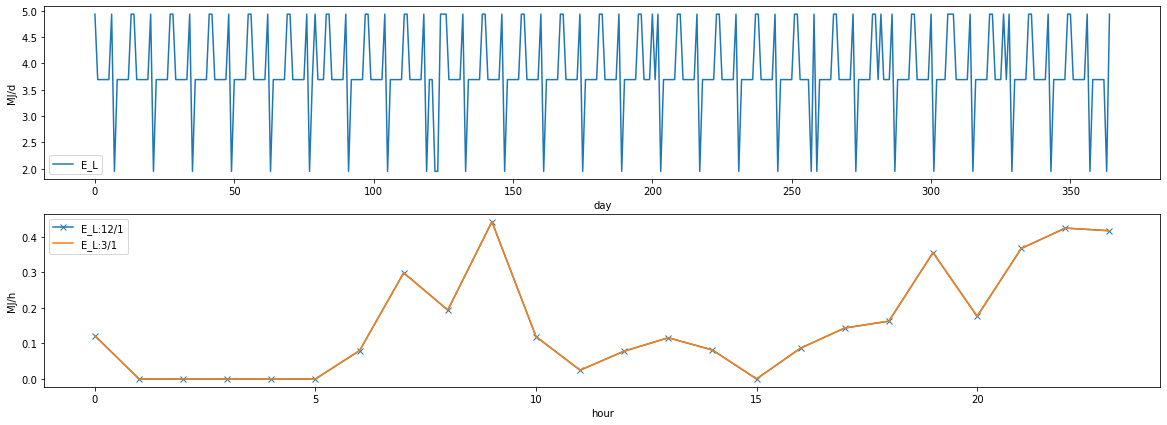

In [50]:
get_each_graph(testcase5)

### 計算条件6

- 仮想居住人数3人
- 住戸全体床面積90m2、主居室床面積25m2、その他の居室床面積35m2
- 主居室：照明設置しない
- その他の居室：照明設置しない
- 非居室：照明設置しない

In [51]:
n_p, A_A, A_MR, A_OR, L = get_default_lighting()
n_p = 3.0
A_A = 90
A_MR = 25
A_OR = 35

L = {"MR_installed" : "設置しない","MR_power" : None,"MR_multi" : None,"MR_dimming" : None,
     "has_OR" : "有","OR_installed" : "設置しない","OR_power" : None,"OR_dimming" : None,
     "has_NO" : "有","NO_installed" : "設置しない","NO_power" : None,"NO_sensor" : None
    }

testcase6 = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)
np.sum(testcase6)

756.5359065796895

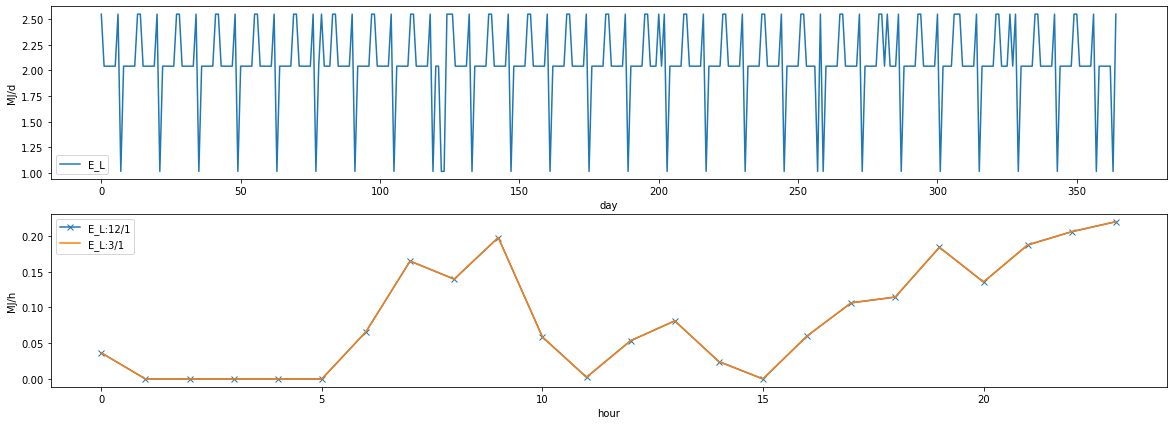

In [52]:
get_each_graph(testcase6)

### 計算条件7

- 仮想居住人数2人
- 住戸全体床面積60m2、主居室床面積20m2、その他の居室床面積25m2
- 主居室：照明設置しない
- その他の居室：照明設置しない
- 非居室：照明設置しない

In [53]:
n_p, A_A, A_MR, A_OR, L = get_default_lighting()

n_p = 2.0
A_A = 60
A_MR = 20
A_OR = 25

L = {"MR_installed" : "設置しない","MR_power" : None,"MR_multi" : None,"MR_dimming" : None,
     "has_OR" : "有","OR_installed" : "設置しない","OR_power" : None,"OR_dimming" : None,
     "has_NO" : "有","NO_installed" : "設置しない","NO_power" : None,"NO_sensor" : None
    }

testcase7 = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)
sum(testcase7)

481.8620975663454

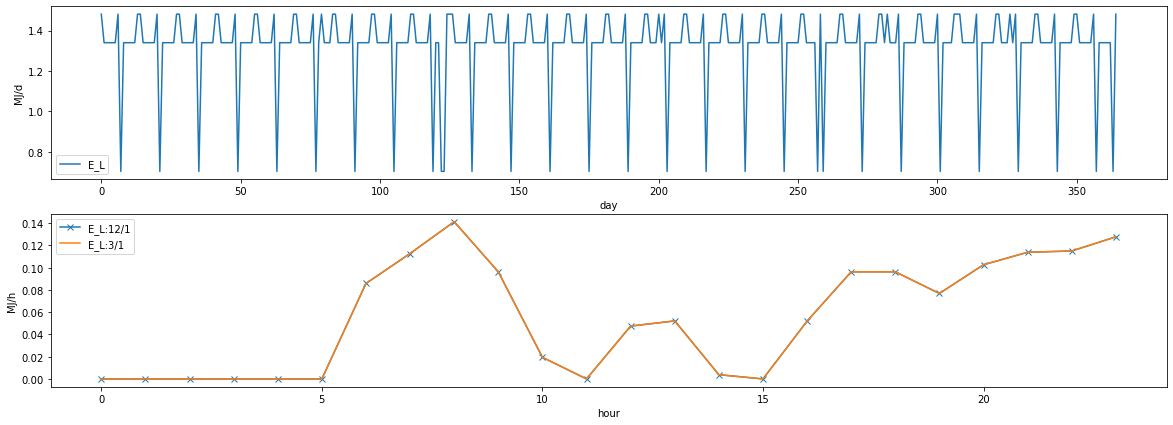

In [54]:
get_each_graph(testcase7)

### 計算条件8

- 仮想居住人数1人
- 住戸全体床面積30m2、主居室床面積10m2
- 主居室：照明設置しない
- その他の居室：照明設置しない
- 非居室：照明設置しない

In [55]:
n_p, A_A, A_MR, A_OR, L = get_default_lighting()

n_p = 1.0
A_A = 30
A_MR = 10

L = {"MR_installed" : "設置しない","MR_power" : None,"MR_multi" : None,"MR_dimming" : None,
     "has_OR" : "有","OR_installed" : "設置しない","OR_power" : None,"OR_dimming" : None,
     "has_NO" : "有","NO_installed" : "設置しない","NO_power" : None,"NO_sensor" : None
    }

testcase8 = calc_E_E_L_d_t(n_p, A_A, A_MR, A_OR, L)
np.sum(testcase8)

169.31907690561613

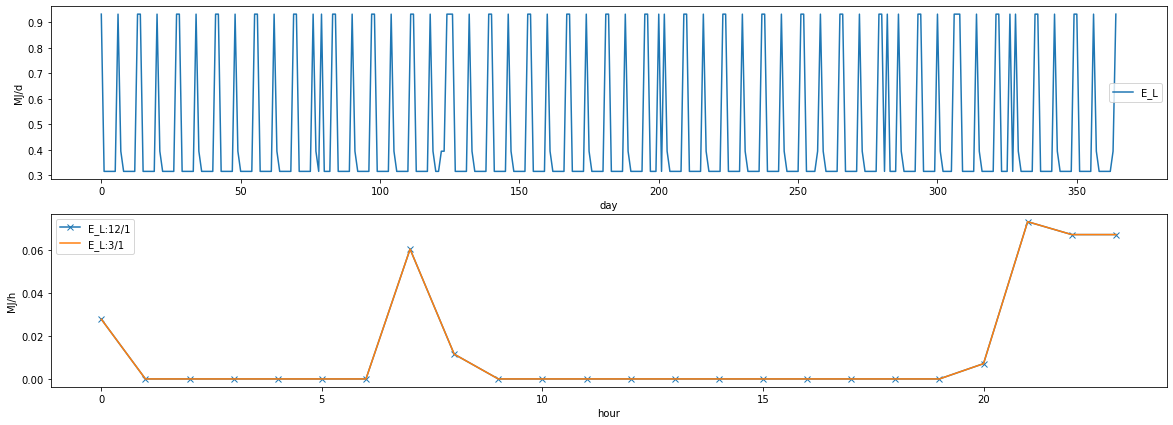

In [56]:
get_each_graph(testcase8)

## 比較

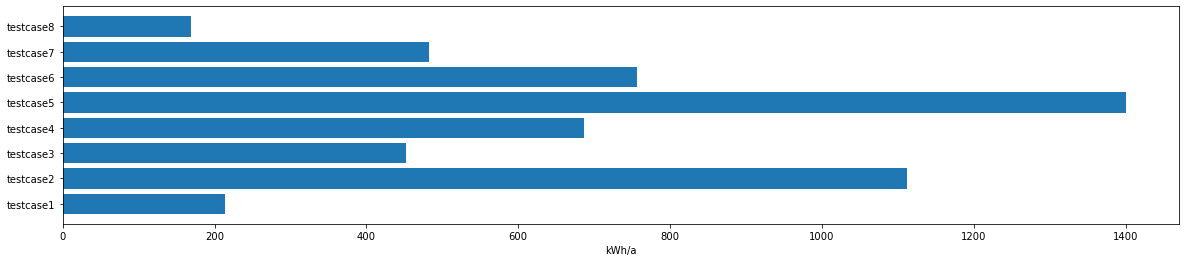

In [57]:
dat = {"testcase1":sum(testcase1),"testcase2" : sum(testcase2), "testcase3" : sum(testcase3), "testcase4" : sum(testcase4), 
       "testcase5" : sum(testcase5), "testcase6" : sum(testcase6), "testcase7" : sum(testcase7), "testcase8" : sum(testcase8)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("kWh/a")
plt.show()
